In [42]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

wine_data = pd.read_csv(
    'http://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data',
    header=None
)

X,y = wine_data.iloc[:, 1:].values, wine_data.iloc[:, 0].values
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,
    random_state=1,
    stratify=y
)

std = StandardScaler()
X_train_std = std.fit_transform(X_train)
X_test_std = std.transform(X_test)

wine_data.columns

Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13], dtype='int64')

In [43]:
print(X_train_std.shape)

(124, 13)


# eigen value, eigen vector

In [44]:
import numpy as np

scov = np.cov(X_train_std.T)
eigen_vals, eigen_vecs = np.linalg.eig(scov)

print("Eigenvalues \n%s" %eigen_vals)

Eigenvalues 
[4.7095539  2.63606471 1.55728758 0.93422662 0.85129454 0.5709688
 0.46462025 0.37764772 0.10409155 0.14951983 0.21165109 0.2630501
 0.27571434]


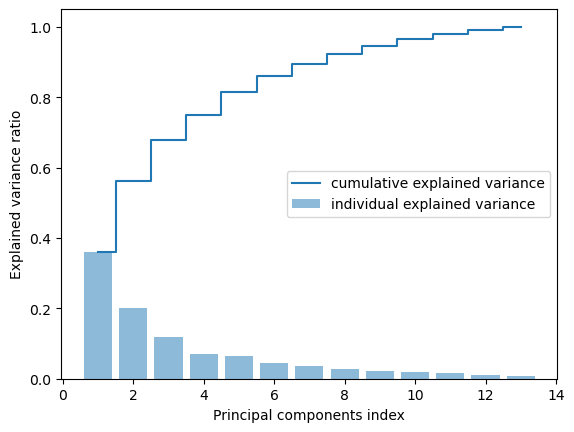

In [45]:
# Explained variance ratio
import matplotlib.pyplot as plt

tot = sum(eigen_vals)
var_exp = [(i / tot) for i in sorted(eigen_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

plt.bar(range(1, 14), var_exp, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(1, 14), cum_var_exp, where='mid', label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components index')
plt.legend(loc='best')
plt.show()

## PCA를 통해 차원 축소 후 로지스틱 회귀

In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA

lr = LogisticRegression(penalty='l2', C=0.1)
pca = PCA(n_components=4)

X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

lr.fit(X_train_pca, y_train)
y_train_pred = lr.predict(X_train_pca)
y_test_pred = lr.predict(X_test_pca)

print(pca.components_)
print(pca.explained_variance_ratio_)

[[ 0.14119433 -0.24946815  0.05104853 -0.19890851  0.1444494   0.40472564
   0.42654202 -0.29573373  0.32620144 -0.07420694  0.29277478  0.37482201
   0.2889145 ]
 [-0.46732089 -0.26876924 -0.27660192  0.01955098 -0.32120489 -0.04839313
   0.00936768 -0.00146817 -0.04087554 -0.53982087  0.27536907  0.19149315
  -0.34828709]
 [-0.18497972  0.11558438  0.62580603  0.63022498  0.06808315  0.14454263
   0.16109721  0.20830498  0.10392829 -0.07463025  0.04770525  0.16694498
  -0.14905602]
 [-0.06135175  0.50736306 -0.23358668  0.06619111 -0.21808618  0.10100723
   0.07511595 -0.33032862  0.45117801 -0.01323281 -0.46488038  0.19553794
  -0.22195876]]
[0.35935182 0.20113893 0.11882529 0.07128404]


In [47]:
from sklearn.metrics import classification_report

print("==" * 10, "Train report", "==" * 10, "\n", classification_report(y_train, y_train_pred))
print("==" * 10, "Test report", "==" * 10, "\n", classification_report(y_test, y_test_pred))

==================== Train report ==================== 
               precision    recall  f1-score   support

           1       0.95      1.00      0.98        41
           2       1.00      0.94      0.97        50
           3       0.97      1.00      0.99        33

    accuracy                           0.98       124
   macro avg       0.97      0.98      0.98       124
weighted avg       0.98      0.98      0.98       124

==================== Test report ==================== 
               precision    recall  f1-score   support

           1       0.90      1.00      0.95        18
           2       1.00      0.90      0.95        21
           3       1.00      1.00      1.00        15

    accuracy                           0.96        54
   macro avg       0.97      0.97      0.97        54
weighted avg       0.97      0.96      0.96        54



# LDA로 차원 축소 후 로지스틱 회귀

In [49]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda = LDA(n_components=2) # LDA가 차원을 2로 줄여준다

X_train_lda = lda.fit_transform(X_train_std, y_train)
X_test_lda = lda.transform(X_test_std)

lr = LogisticRegression(penalty='l2', C=0.1)
lr.fit(X_train_lda, y_train)
y_train_pred = lr.predict(X_train_lda)
y_test_pred = lr.predict(X_test_lda)

print("==" * 10, "Train report", "==" * 10, "\n", classification_report(y_train, y_train_pred))
print("==" * 10, "Test report", "==" * 10, "\n", classification_report(y_test, y_test_pred))

==================== Train report ==================== 
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        41
           2       1.00      1.00      1.00        50
           3       1.00      1.00      1.00        33

    accuracy                           1.00       124
   macro avg       1.00      1.00      1.00       124
weighted avg       1.00      1.00      1.00       124

==================== Test report ==================== 
               precision    recall  f1-score   support

           1       0.95      1.00      0.97        18
           2       1.00      0.90      0.95        21
           3       0.94      1.00      0.97        15

    accuracy                           0.96        54
   macro avg       0.96      0.97      0.96        54
weighted avg       0.97      0.96      0.96        54



In [50]:
lda.explained_variance_ratio_

array([0.68259828, 0.31740172])